<a href="https://colab.research.google.com/github/Ilzhuu/HPC_1/blob/main/IBDA_L9_Texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan for today

*   Build an example text input predictor model
*   Learn to Interpret the results
*   Build you own text input predictor



# Building predictive model

### Our tasks:

*   Getting some data - tweets, blogs, news articles, etc...
*   Cleaning them from punctuation, emotionals, numbers and other odd things
*   Build a corpus from the cleaned data
*   Build a nGram model
*   Use the model to predict the next input



### Source of data sets: https://www.kaggle.com/datasets/crmercado/tweets-blogs-news-swiftkey-dataset-4million

## Connecting to Google drive

In [2]:
# Connecting to your Google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Getting the drive content
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls

## TWEETS example

### Cleaning the data

In [ ]:
import pandas as pd

# Reding file "tweets.txt"
file = open("tweets.txt", "r")
TWEETS_raw = file.readlines()
print(len(TWEETS_raw))

for i in range(20): # printing only first 20 rows
    print(TWEETS_raw[i])

TWEETS_short = TWEETS_raw[:2000]
print(len(TWEETS_short))


2360148
How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.

When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.

they've decided its more fun if I don't.

So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)

Words from a complete stranger! Made my birthday even better :)

First Cubs game ever! Wrigley field is gorgeous. This is perfect. Go Cubs Go!

i no! i get another day off from skool due to the wonderful snow (: and THIS wakes me up...damn thing

I'm coo... Jus at work hella tired r u ever in cali

The new sundrop commercial ...hehe love at first sight

we need to reconnect THIS WEEK

I always wonder how the guys on the auctions shows learned to talk so fast!? all I hear is djsosnekspqnslanskam.

Dammnnnnn what a catch

such a great picture! The green shirt totally brings out your eyes!

Desk put together, room all set up. Oh boy, o

In [ ]:
# Executing symbol replacement rules
TWEETS = []

#for line in TWEETS_short: #  ŠĪ IR TĀ VIETA, KAS MAINA SITUĀCIJU - JA LIETOJAM TWEETS_short, laiks nav problēma. Ja TWEETS_raw, tad vekotrizējot aiziet laiks pāris stundas (vēl nav izpildījies)
for line in TWEETS_raw:
  line = line.replace('\'','')
  line = line.replace('?','')
  line = line.replace('!','')
  line = line.replace(':','')
  line = line.replace(';','')
  line = line.replace(')','')
  line = line.replace('(','')
  line = line.replace('-','')
  line = line.replace('_','')
  line = line.replace('.','')
  line = line.replace(',','')
  line = line.replace('&','')
  line = line.replace('👦','')
  line = line.replace('\d+', '')

  TWEETS.append(line.lower())

print(len(TWEETS))

for i in range(20): # printing only first 20 rows
    print(TWEETS[i])


2360148
how are you btw thanks for the rt you gonna be in dc anytime soon love to see you been way way too long

when you meet someone special youll know your heart will beat more rapidly and youll smile for no reason

theyve decided its more fun if i dont

so tired d played lazer tag  ran a lot d ughh going to sleep like in 5 minutes 

words from a complete stranger made my birthday even better 

first cubs game ever wrigley field is gorgeous this is perfect go cubs go

i no i get another day off from skool due to the wonderful snow  and this wakes me updamn thing

im coo jus at work hella tired r u ever in cali

the new sundrop commercial hehe love at first sight

we need to reconnect this week

i always wonder how the guys on the auctions shows learned to talk so fast all i hear is djsosnekspqnslanskam

dammnnnnn what a catch

such a great picture the green shirt totally brings out your eyes

desk put together room all set up oh boy oh boy

im doing it

beauty brainstorming in the a

In [ ]:
# Vectorization - process of turning a collection of text documents into numerical feature vectors

from sklearn.feature_extraction.text import CountVectorizer

TWEETS_singleline = ' '.join(TWEETS)                          # All lines are joined into a single line (for simplicity reasons)
TWEETS_singleline = TWEETS_singleline.replace('\n','')        # Removing 'new line' symbols
print(TWEETS_singleline)                                      # Debug ouput

vectorizer2 = CountVectorizer(analyzer='word')                # Building a word count vector transformer
X2 = vectorizer2.fit_transform([TWEETS_singleline])           # Building the word count vector matrix
print(vectorizer2.get_feature_names_out())
print(len(vectorizer2.get_feature_names_out()))                   # Debug output - matrix shape

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['00' '000' '0000' ... 'ｒｔ' 'ｿﾛﾗｲﾌﾞ' 'ﾉﾉ']
482082


In [ ]:
print(X2.toarray())                                           # Debug output
print(X2.shape)                                               # debug output

[[181  38   8 ...   1   1   1]]
(1, 482082)


### Building the quantitative model

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer  # Frequency transformer - counts to frequencies
# Transform a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.

import numpy as np
import pandas as pd

tf_transformer = TfidfTransformer(use_idf=False).fit(X2)      # Creating the transformer instance
X2_tf = tf_transformer.transform(X2)                          # Applying the transformer
print(X2_tf.shape)                                            # Debug output
print(X2_tf[0,0])                                             # Debug output

(1, 482082)
9.379967830672851e-05


In [ ]:
UniqueWords = vectorizer2.get_feature_names_out()                 # Getting unique words in a separate list for conveniece


lst = [] #creating a list for output and prediction purposes
for i in range(0,len(UniqueWords)):  # Filling the data frame with data Unique word, Frequency
  word = UniqueWords[i]
  freq = X2_tf[0,i]
  lst.append({'Words': word, 'Frequency':freq})
  #WordUse_DF = WordUse_DF.append({'Words': word, 'Frequency':freq})
WordUse_DF = pd.DataFrame(lst, columns=['Words','Frequency'], ignore_index=True)      # Creating a dataframe out of the list
WordUse_DF = WordUse_DF.sort_values(by=['Frequency'], ascending=False)  # Sorting the data by frequency - highest first
WordUse_DF = WordUse_DF.set_index('Words')                              # Setting index for data selection
WordUse_DF['Words'] =  WordUse_DF.index.values                          # Creating a separate column for prediction needs

WordUse_DF_short = WordUse_DF.head(50)                                        # selecting the first 50 most frequent words

print( WordUse_DF_short)
print('Done ....')

KeyboardInterrupt: ignored

<Axes: xlabel='Words'>

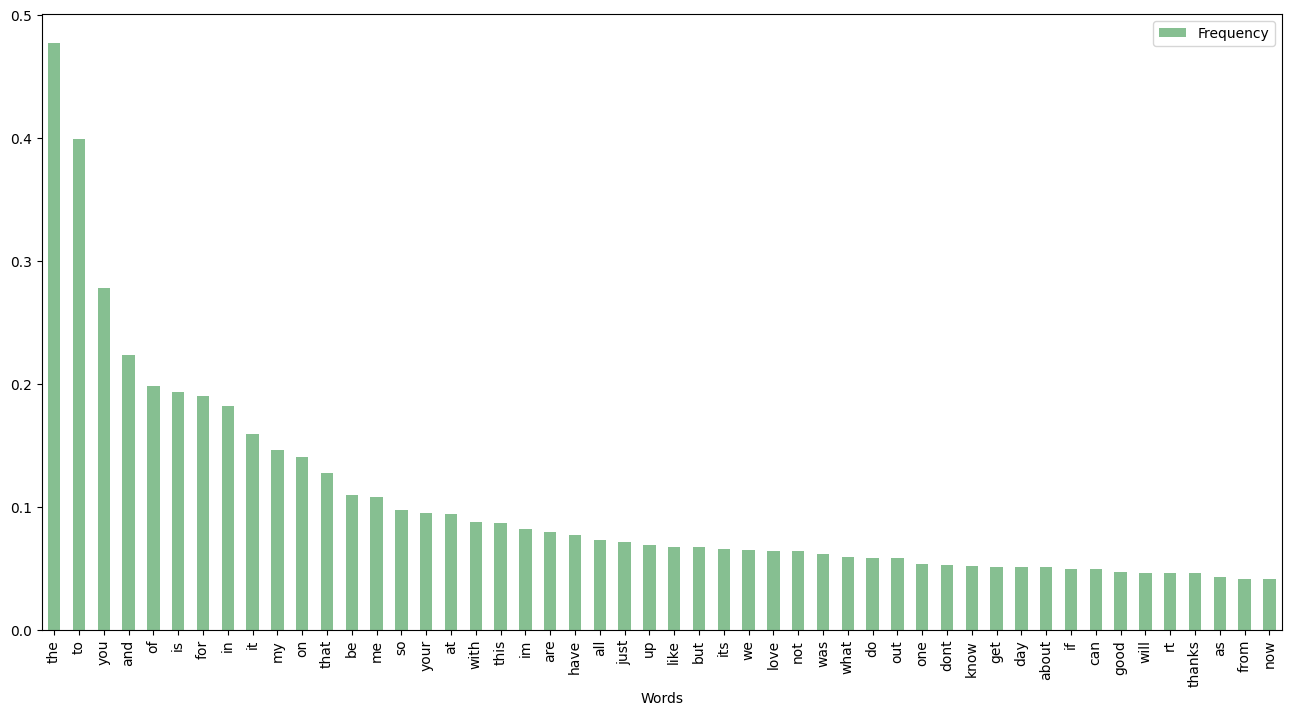

In [ ]:
WordUse_DF_short.plot(kind='bar',figsize=(16,8), color='#86bf91')             # PLotting the frequencies

### A simple predictor

Predictor is based on slecting the most frequent word having a beginning of the word as an input

In [ ]:
input = 'cla'                                                    # The first letter of input word
output = WordUse_DF[WordUse_DF.Words.str.startswith(input)]     # Selecting matching words
print(output['Words'].head(10).values)                           # Selecting the top frequent one


['class' 'claim' 'classifying' 'classic' 'classes' 'clark' 'clan']


# Your own work

1.  Download data set 'blogs_short.txt' from the Ortus space
2.  Upload it to **your** Google Drive
3.  Perform a data cleaning
4.  Check the cleaning result
5.  Implement a quantitative model and visualize it
6.  What are the differences comparing BLOGS and TWEETS?
7.  Implement and check the predictor



In [ ]:
# Your own code

## Part of Solution

In [ ]:
# Reding file "NEWS.txt"
file = open("NEWS.txt", "r")
NEWS_raw = file.readlines()
for line in NEWS_raw:
  print(line)

In [ ]:
# Executing symbol replacement rules
NEWS = []

for line in NEWS_raw:
  line = line.replace('\'','')
  line = line.replace('?','')
  line = line.replace('!','')
  line = line.replace(':','')
  line = line.replace(';','')
  line = line.replace(')','')
  line = line.replace('(','')
  line = line.replace('-','')
  line = line.replace('_','')
  line = line.replace('.','')
  line = line.replace(',','')
  line = line.replace('&','')
  line = line.replace('\d+', '')

  # CHECK for the numericals !!!!!!

  NEWS.append(line.lower())

for line in NEWS:
  print(line)
print(len(NEWS))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

NEWS_singleline = ' '.join(NEWS)                            # All lines are joined into a single line (for simplicity reasons)
NEWS_singleline = NEWS_singleline.replace('\n','')          # Removing 'new line' symbols
print(NEWS_singleline)                                      # Debug ouput

vectorizer2 = CountVectorizer(analyzer='word')                # Building a word count vector transformer
X2 = vectorizer2.fit_transform([NEWS_singleline])             # Building the word count vector matrix
print(vectorizer2.get_feature_names())                        # Debug output - unique word (token) output
print(len(vectorizer2.get_feature_names()))                   # Debug output - matrix shape